In [1]:
import heisensim as sim
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

%matplotlib widget

## Commparison Pair model

In [2]:
positions = np.array([[0, 0, 0], [1, 0, 0]])
int_range = sim.DipoleCoupling(2*np.pi)

In [21]:
int_mat = 0*np.array([[0,1], [1, 0]])
int_type = sim.XX()
state = sim.up_x
t_list = np.linspace(0, 2, 101)
h = 1*2*np.pi

In [22]:
spin_model = sim.SpinModel(int_mat, int_type=int_type)
# spin_model = sim.SpinModel.from_pos(positions, int_params=int_range, int_type=int_type)
psi_0 = spin_model.product_state(state)
magn = spin_model.magn()
H = spin_model.hamiltonian(hy=h)
solution = qt.sesolve(H, psi_0, t_list, e_ops=[magn])

In [23]:
single_pair = sim.SinglePair(int_mat[0, 1]/4, int_type.zz / int_type.xx)
single_pair = sim.SinglePair.from_pair(pos1=positions[0], pos2=positions[1], int_range=int_range, int_type=int_type)
dynamics_single_pair = np.array([single_pair.time_evolution(t, h) for t in t_list])
diagonal = single_pair.get_diagonal(h=h)

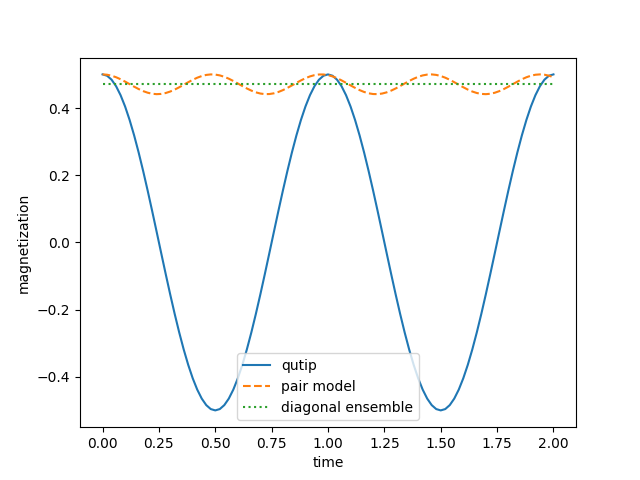

In [24]:
fig, ax = plt.subplots()

ax.plot(solution.times, solution.expect[0], label="qutip")
ax.plot(t_list, dynamics_single_pair, linestyle="--", label="pair model")
ax.plot(t_list, diagonal* np.ones(len(t_list)), linestyle=":", label="diagonal ensemble")

ax.set_xlabel("time")
ax.set_ylabel('magnetization')

ax.legend()

## Comparison Emch radin

In [7]:
N = 6
np.random.seed(0)
int_mat = 2 * np.pi * np.random.rand(N, N)
int_mat += int_mat.T
np.fill_diagonal(int_mat, 0)
int_mat

array([[ 0.        ,  7.24310886,  7.35640323,  8.31290507,  3.40504175,
         5.72052434],
       [ 7.24310886,  0.        , 11.8705669 ,  7.87568166,  8.99529749,
         8.18779853],
       [ 7.35640323, 11.8705669 ,  0.        ,  6.69628992,  1.02775121,
         8.09758185],
       [ 8.31290507,  7.87568166,  6.69628992,  0.        ,  8.83509021,
         8.47578529],
       [ 3.40504175,  8.99529749,  1.02775121,  8.83509021,  0.        ,
         2.72345761],
       [ 5.72052434,  8.18779853,  8.09758185,  8.47578529,  2.72345761,
         0.        ]])

In [8]:
int_mat = 0*2*np.pi*np.array([[0,1], [1, 0]])
int_type = sim.Ising()
state = sim.up_x
t_list = np.linspace(0, 4, 101)
h = 2*np.pi*1
int_mat

array([[0., 0.],
       [0., 0.]])

In [9]:
spin_model = sim.SpinModel(int_mat, int_type=int_type)
psi_0 = spin_model.product_state(state)
magn = spin_model.magn()
H = spin_model.hamiltonian(hy=h)
solution = qt.sesolve(H, psi_0, t_list, e_ops=[magn])
emch_radin = [np.mean(spin_model.emch_radin(t)) for t in t_list]

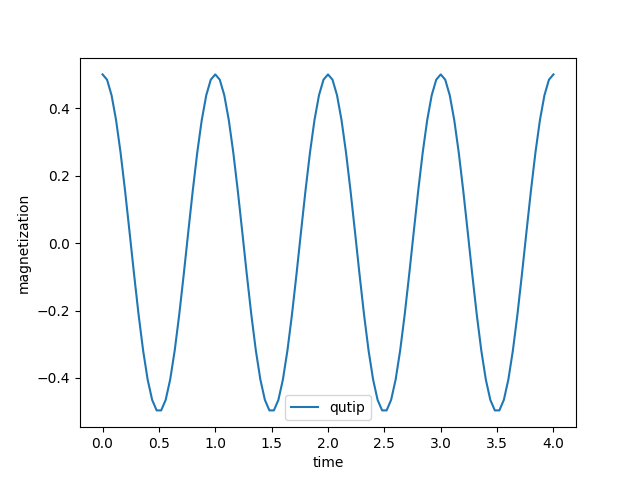

In [10]:
fig, ax = plt.subplots()

ax.plot(solution.times, solution.expect[0], label="qutip")
#ax.plot(t_list, emch_radin, linestyle="--", label="emch radin")

ax.set_xlabel("time")
ax.set_ylabel('magnetization')

ax.legend()

## comparison field